<a href="https://colab.research.google.com/github/Erick-Cavalcante/multiple-linear-regression-model/blob/main/projeto__parceria_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regressão linear







#1.Dividindo os dados

Estudaremos os dados de vendas de um dos maiores varejistas do mundo. Vamos descobrir quais fatores influenciam sua receita.O conjunto de dados pode ser encontrado no [link](https://raw.githubusercontent.com/Erick-Cavalcante/multiple-linear-regression-model/refs/heads/main/Walmart_Sales.csv) Trata-se de uma cópia do conjunto de dados do Kaggle disponível no [link](https://www.kaggle.com/datasets/mikhail1681/walmart-sales)

##1.2.Objetivo

dado o preço do combustivelFuel_Price qual deve  a previsão de Vendas Semanais(Weekly_Sales)

Prever as vendas semanais (Weekly_Sales) com base nas variáveis:

*   Temperatura
*   Preço de combustível
*   CPI (Consumer Price Index)
*   Taxa de desemprego




##1.3.Bibliotecas usadas

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
!wget -q 'https://raw.githubusercontent.com/Erick-Cavalcante/multiple-linear-regression-model/refs/heads/main/Walmart_Sales.csv' -O Walmart_Sales.csv

In [ ]:
import pandas as pd

walmart_df=pd.read_csv('Walmart_Sales.csv')
walmart_df.head(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [ ]:
walmart_df.reset_index(drop=True, inplace=True)  # Reseta o índice
walmart_df.index += 1

In [ ]:
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
3,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
4,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
5,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 1 to 6435
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
walmart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [ ]:
walmart_df.drop([ "Date",'Store','Holiday_Flag','CPI','Unemployment','Temperature'], axis=1).describe()

,Weekly_Sales,Fuel_Price
count,6.435000e+03,6435.000000
mean,1.046965e+06,3.358607
std,5.643666e+05,0.459020
min,2.099862e+05,2.472000
25%,5.533501e+05,2.933000
50%,9.607460e+05,3.445000
75%,1.420159e+06,3.735000
max,3.818686e+06,4.468000


In [ ]:
data = walmart_df[['Weekly_Sales','Fuel_Price']]

In [ ]:
data.head()

,Weekly_Sales,Fuel_Price
1,1643690.90,2.572
2,1641957.44,2.548
3,1611968.17,2.514
4,1409727.59,2.561
5,1554806.68,2.625


##1.4.treino/teste

In [ ]:
from sklearn.model_selection import train_test_split

predictors_train , predictors_test, target_train, target_test = train_test_split(
    data.drop(['Weekly_Sales'], axis=1),
    data['Weekly_Sales'],
    test_size=0.25,
    random_state=123 )

In [ ]:
predictors_train.head()

,Fuel_Price
3610,2.717
4853,3.610
4186,2.716
3051,3.177
5634,3.437


In [ ]:
predictors_train.shape

(4826, 1)

In [ ]:
predictors_test.head()

,Fuel_Price
2690,4.170
2602,2.923
6207,3.346
5927,3.917
5864,2.962


In [ ]:
predictors_test.shape

(1609, 1)

In [ ]:
target_train.head()

,Weekly_Sales
3610,923221.52
4853,926250.21
4186,438334.39
3051,774262.28
5634,977070.62


In [ ]:
target_train.shape

(4826,)

In [ ]:
target_test.head()

,Weekly_Sales
2690,1255087.26
2602,1418027.08
6207,284496.14
5927,534597.69
5864,543384.01


In [ ]:
target_test.shape

(1609,)

#2.treino

##2.1.Algoritimo

In [ ]:
model = model.fit(predictors_train, target_train)

In [ ]:
model. __dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Fuel_Price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([8704.11574457]),
 'rank_': 1,
 'singular_': array([31.68228397]),
 'intercept_': 1016552.3795807775}

In [ ]:
a = model.coef_
print(a)

[8704.11574457]


In [ ]:
b = model.intercept_
print(b)

1016552.3795807775


In [ ]:
data.head(1)

,Weekly_Sales,Fuel_Price
1,1643690.9,2.572


In [ ]:
preco_gasolina = 2.572
vendas_semanais= (a *preco_gasolina ) + b
print(vendas_semanais)

[1038939.36527581]


In [ ]:
preco_gasolina= np.array([2.572])
vendas_semanais = model.predict(preco_gasolina.reshape(-1, 1))
print(vendas_semanais)

[1038939.36527581]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#3.avaliação

**W** e **H**

**.Vendas Semanais preditas**

In [ ]:
target_predicted = model.predict(predictors_test)

In [ ]:
target_predicted[0:5]

array([1052848.54223563, 1041994.50990215, 1045676.35086211,
       1050646.40095226, 1042333.97041619])

In [ ]:
target_predicted.shape

(1609,)

In [ ]:
target_test[0:5]

,Weekly_Sales
2690,1255087.26
2602,1418027.08
6207,284496.14
5927,534597.69
5864,543384.01


In [ ]:
target_test.shape

(1609,)

##3.1.Rmse

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

567535.2980086949


In [ ]:
test_data = pd.concat( [ predictors_test, pd.DataFrame(target_test, columns=['Weekly_Sales']) ], axis=1 ).reset_index(drop=True)
test_data['predicted'] = False

In [ ]:
test_data.head()

,Fuel_Price,Weekly_Sales,predicted
0,4.170,1255087.26,False
1,2.923,1418027.08,False
2,3.346,284496.14,False
3,3.917,534597.69,False
4,2.962,543384.01,False


In [ ]:
prediction_data = pd.concat( [ predictors_test.reset_index(drop=True), pd.DataFrame(target_predicted, columns=['Weekly_Sales']) ], axis=1 ).reset_index(drop=True)
prediction_data['predicted'] =True

In [ ]:
prediction_data.tail()

,Fuel_Price,Weekly_Sales,predicted
1604,3.130,1.043796e+06,True
1605,3.409,1.046225e+06,True
1606,3.236,1.044719e+06,True
1607,3.547,1.047426e+06,True
1608,3.485,1.046886e+06,True


In [ ]:
prediction = pd.concat( [test_data, prediction_data] ).reset_index(drop=True)

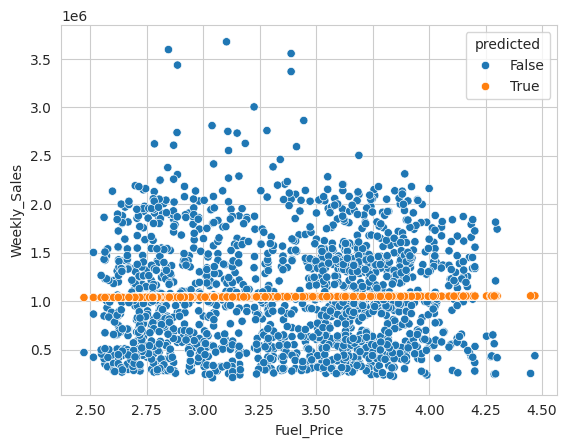

In [ ]:
with sns.axes_style('whitegrid'): # peso = 88.9746 * altura - 80.2631
  sns.scatterplot(data=prediction, x='Fuel_Price', y='Weekly_Sales', hue='predicted')

##3.2.Comparação

In [ ]:
data = walmart_df[['Weekly_Sales','Fuel_Price','Holiday_Flag']]

In [ ]:
data['Holiday_Flag'].drop_duplicates()

,Holiday_Flag
1,0
2,1


In [ ]:
from sklearn.model_selection import train_test_split

predictors_train , predictors_test, target_train, target_test = train_test_split(
    data.drop(['Weekly_Sales'], axis=1),
    data['Weekly_Sales'],
    test_size=0.25,
    random_state=123 )

In [ ]:
model_v2=model.fit(predictors_train,target_train)
model_v2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Fuel_Price', 'Holiday_Flag'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([11987.14422726, 75068.60090442]),
 'rank_': 2,
 'singular_': array([31.72618805, 17.65059496]),
 'intercept_': 1000271.0822596215}

In [ ]:
target_predicted=model_v2.predict(predictors_test)

In [ ]:
rmse_v2=np.sqrt(mean_squared_error(target_test,target_predicted))
print(rmse_v2)

566917.3042010772


In [ ]:
print(f"Melhoria de {round(100 * (1 - (rmse_v2 / rmse)), 2)}%")

Melhoria de 0.11%


In [ ]:
test_data = pd.concat( [ predictors_test, pd.DataFrame(target_test, columns=['Weekly_Sales']) ], axis=1 ).reset_index(drop=True)
test_data['predicted'] = False

prediction_data = pd.concat( [ predictors_test.reset_index(drop=True), pd.DataFrame(target_predicted, columns=['Weekly_Sales']) ], axis=1 ).reset_index(drop=True)
prediction_data['predicted'] = True

prediction_v2 = pd.concat( [test_data, prediction_data] ).reset_index(drop=True)

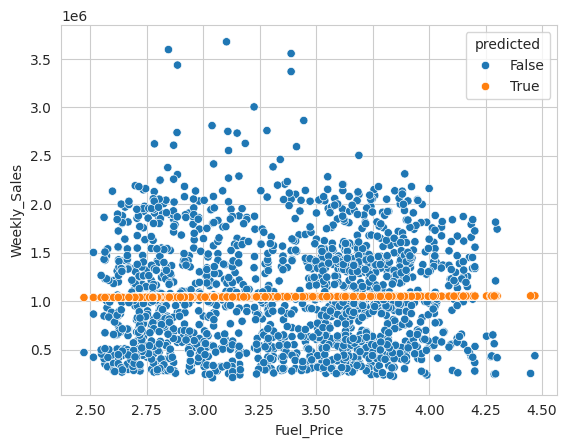

In [ ]:
with sns.axes_style('whitegrid'): # peso = 88.9746 * altura - 80.2631
  sns.scatterplot( data=prediction , x='Fuel_Price', y='Weekly_Sales', hue='predicted' )

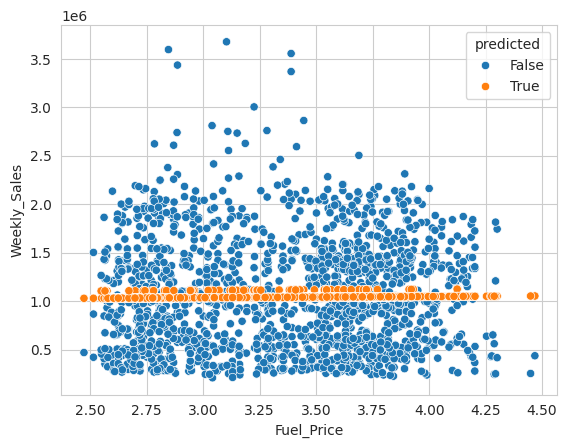

In [ ]:
with sns.axes_style('whitegrid'): # peso = 3.51 * altura + 0.42 * posicao_f + ... + 99.07
  sns.scatterplot( data=prediction_v2 , x='Fuel_Price', y='Weekly_Sales', hue='predicted' )

In [ ]:
preco_Media_gasolina=data['Fuel_Price'].mean()
preco_gasolina_desvio_padrao=data['Fuel_Price'].std()

#4.Predição

In [ ]:
data.head()

,Weekly_Sales,Fuel_Price,Holiday_Flag
1,1643690.90,2.572,0
2,1641957.44,2.548,1
3,1611968.17,2.514,0
4,1409727.59,2.561,0
5,1554806.68,2.625,0


In [ ]:
preco_gasolina_padronizado = (4.000	-preco_Media_gasolina) / preco_gasolina_desvio_padrao
print(preco_gasolina_padronizado)

1.3973107305471053


In [ ]:
nova_venda=np.array([preco_gasolina_padronizado,1])
print(nova_venda)

[1.39731073 1.        ]


In [ ]:
vendas = model_v2.predict(nova_venda.reshape(1, -1))
print(vendas)

[1092089.44842141]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(f"Previsão de Vendas Semanais :{vendas} ",)

Previsão de Vendas Semanais :[1092089.44842141] 
